In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-traffic-passenger-datae/Air_Traffic_Passenger_Statistics.csv


## Importing Libraries & Reading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../input/air-traffic-passenger-datae/Air_Traffic_Passenger_Statistics.csv")
dataset.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [3]:
dataset.shape

(15007, 16)

In [4]:
# Here, we are looking for if there is empty data.
dataset.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [5]:
# Here, we want to info about data. Checking for datatypes and non-null count.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [6]:
# We don't need IATA Codes. So we drop them.
dataset.drop(['Operating Airline IATA Code','Published Airline IATA Code'], axis=1, inplace=True)
dataset.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [7]:
# Now we have non-empty data.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Published Airline            15007 non-null  object
 3   GEO Summary                  15007 non-null  object
 4   GEO Region                   15007 non-null  object
 5   Activity Type Code           15007 non-null  object
 6   Price Category Code          15007 non-null  object
 7   Terminal                     15007 non-null  object
 8   Boarding Area                15007 non-null  object
 9   Passenger Count              15007 non-null  int64 
 10  Adjusted Activity Type Code  15007 non-null  object
 11  Adjusted Passenger Count     15007 non-null  int64 
 12  Year                         15007 non-null  int64 
 13  Month                        15

In [8]:
# Here, we can see passenger count for each airline.
dataset.groupby("Operating Airline").sum()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
Operating Airline,,,,
ATA Airlines,8825800,384764,425113,88255
Aer Lingus,19712844,431904,431904,197122
Aeromexico,36217356,983488,983488,362162
Air Berlin,7239870,83547,83547,72396
Air Canada,73611200,6680071,6680071,736088
...,...,...,...,...
Virgin Atlantic,51869286,2540553,2540553,518676
WestJet Airlines,20715962,549830,549830,207152
World Airways,603025,785,785,6030


## Data Visualizing

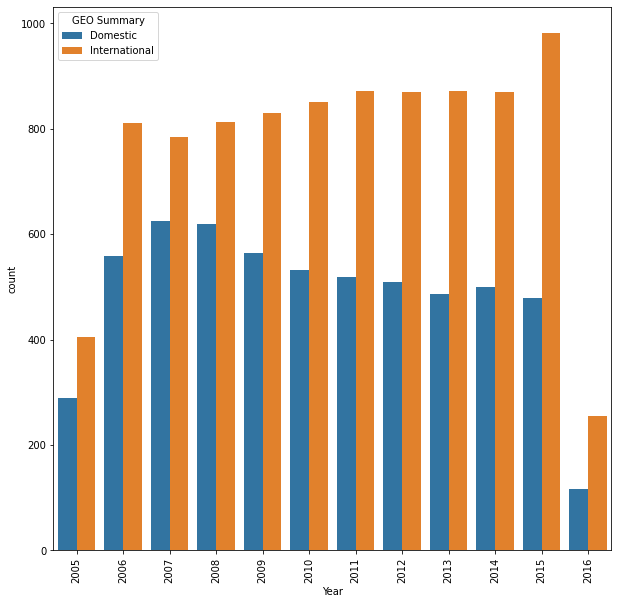

In [9]:
# Here, we can see that domestic or international flight count for each year.
plt.figure(figsize=(10,10))
sns.countplot(data=dataset, x="Year", hue = "GEO Summary")
plt.xticks(rotation=90)
plt.show()

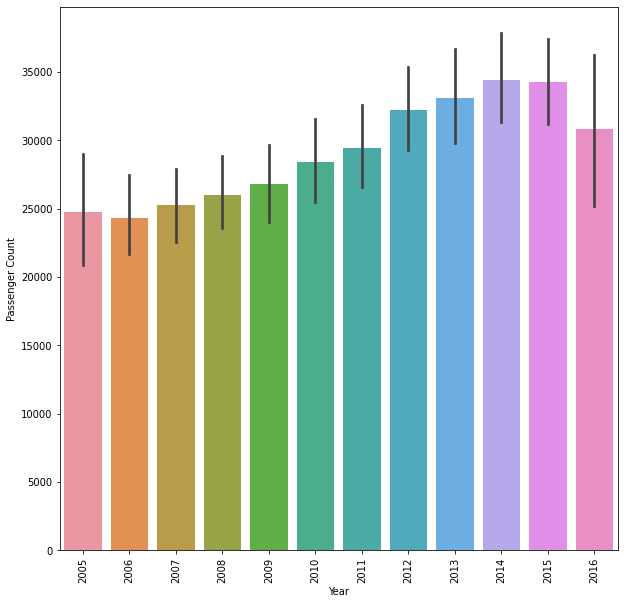

In [10]:
# Here, we can see passenger counts for each year.
plt.figure(figsize=(10,10))
sns.barplot(data=dataset, x="Year", y="Passenger Count")
plt.xticks(rotation=90)
plt.show()

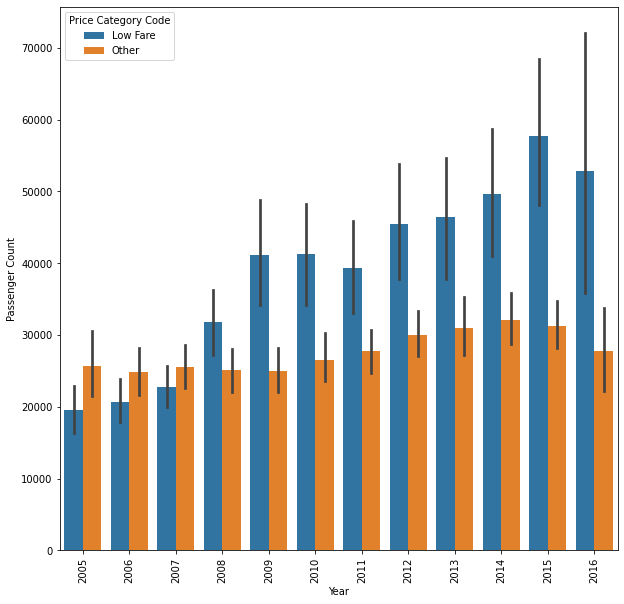

In [11]:
# Here, we can see passenger count per category code for each year.
plt.figure(figsize=(10,10))
sns.barplot(data=dataset, x="Year", y="Passenger Count", hue="Price Category Code")
plt.xticks(rotation=90)
plt.show()

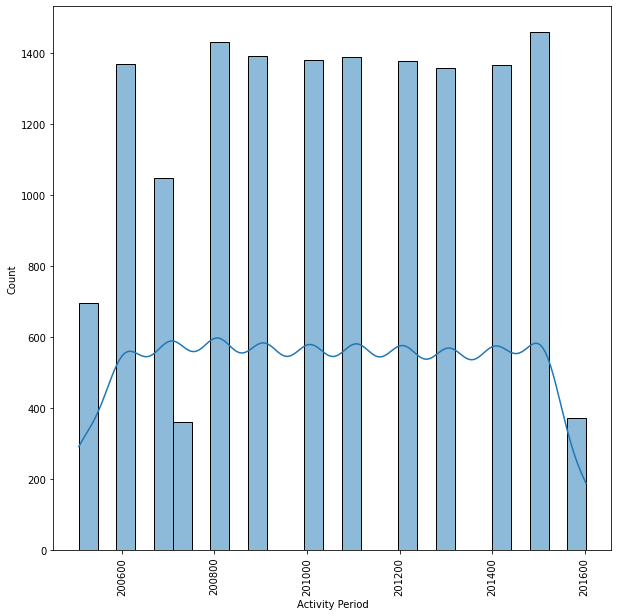

In [12]:
# Here, we can see activity count from beginning till end.
plt.figure(figsize=(10,10))
sns.histplot(data=dataset, x="Activity Period", kde=True)
plt.xticks(rotation=90)
plt.show()

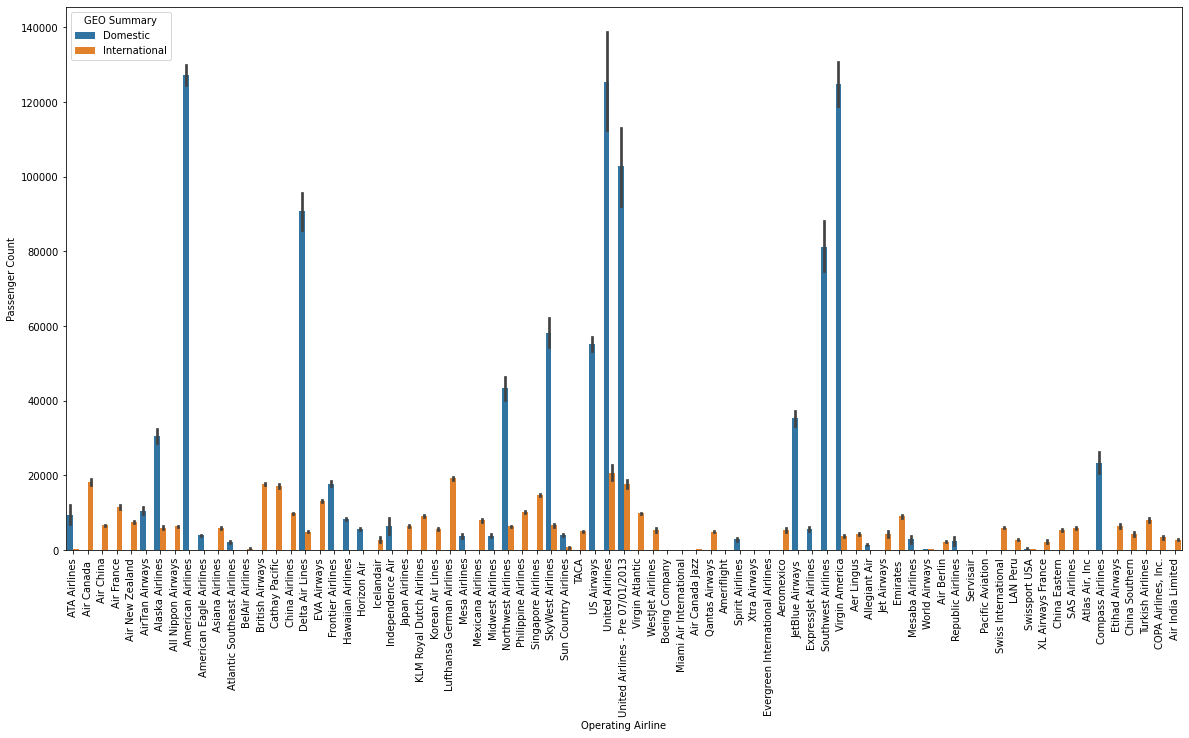

In [13]:
# Here, we can see domestic or international flight count per airline for each year.
plt.figure(figsize=(20,10))
sns.barplot(data=dataset, x="Operating Airline", y="Passenger Count", hue="GEO Summary")
plt.xticks(rotation=90)
plt.show()